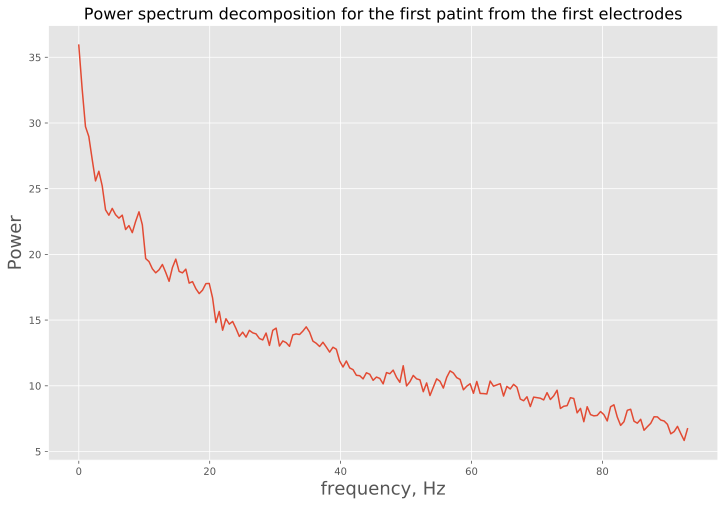

In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# allows to output plots in the notebook
%matplotlib inline 

# makes inline plots to have better quality (can replace svg with retina as well)
%config InlineBackend.figure_format = 'svg'

# can change the default style of plots - google for more choices
plt.style.use("ggplot")

dataclosed = sio.loadmat('DataOpen.mat')
data_c = np.array(dataclosed['DataOpen'])

dataopen = sio.loadmat('DataClose.mat')
data_o = np.array(dataopen['DataClose'])

yaxis = data_c[0][0]
xaxis = np.linspace(0, 93, len(data_c[0][0]))
plt.figure(figsize=(12,8))
plt.plot(xaxis, yaxis)
plt.xlabel('frequency, Hz', fontsize=18)
plt.ylabel('Power', fontsize=18)
plt.title('Power spectrum decomposition for the first patint from the first electrodes', fontsize=16)
plt.show()

In [67]:
concatenated_4.shape

(732,)

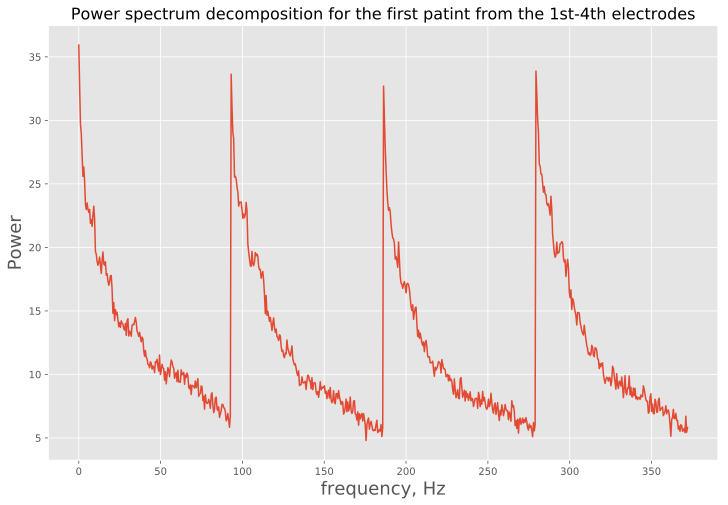

In [112]:
concatenated_4 = np.concatenate((data_c[0][0], data_c[0][1], data_c[0][2], data_c[0][3]), axis=0)
yaxis = concatenated_4
xaxis = np.linspace(0, 372, len(concatenated_4))
plt.figure(figsize=(12,8))
plt.plot(xaxis, yaxis)
plt.xlabel('frequency, Hz', fontsize=18)
plt.ylabel('Power', fontsize=18)
plt.title('Power spectrum decomposition for the first patint from the 1st-4th electrodes', fontsize=16)
plt.show()

**AVG data full**

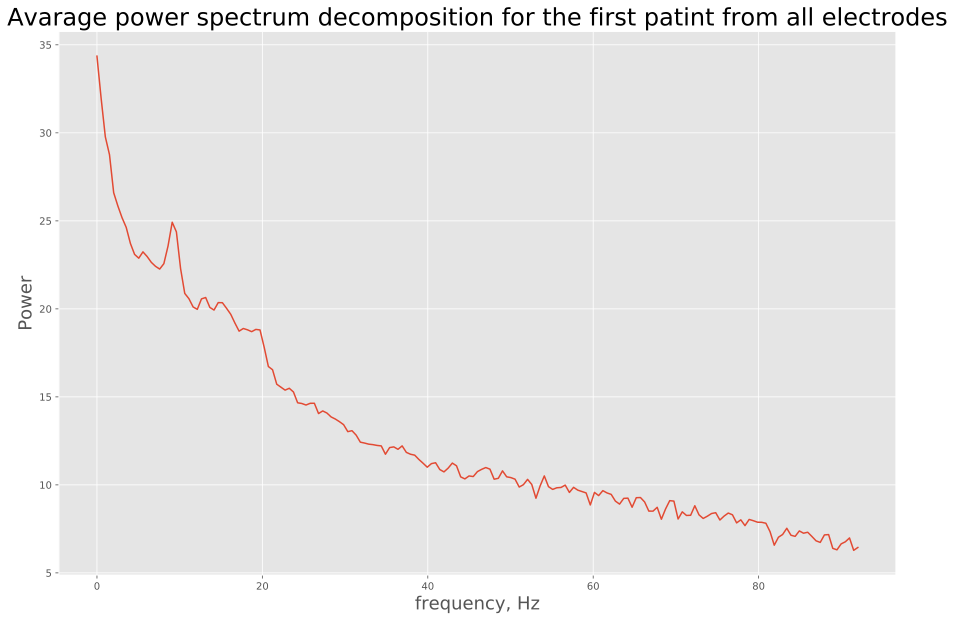

In [2]:
COLUMN_NAMES=np.arange(183)
data_avg_c = pd.DataFrame(columns=COLUMN_NAMES)
for i in range(len(data_c)):
    data_avg_c.loc[i] = (np.mean(data_c[i][:], axis = 0))
    
data_avg_o = pd.DataFrame(columns=COLUMN_NAMES)
for i in range(len(data_o)):
    data_avg_o.loc[i] = (np.mean(data_o[i][:], axis = 0))

data_avg = pd.concat([data_avg_o.reset_index(drop=True), data_avg_c], axis=1)

    
yaxis = data_avg_c.loc[0]
xaxis = np.linspace(0, 92, len(data_avg_c.loc[0]))
plt.figure(figsize=(15,10))
plt.plot(xaxis, yaxis)
plt.xlabel('frequency, Hz', fontsize=18)
plt.ylabel('Power', fontsize=18)

plt.title('Avarage power spectrum decomposition for the first patint from all electrodes', fontsize=24)
plt.show()

In [10]:
data_avg_o.shape

(289, 183)

In [11]:
data_o.shape

(289, 32, 183)

**5 regions**

In [3]:
data_5_bins_c = pd.DataFrame(columns = ['delta', 'theta', 'alpha', 'betta', 'gamma'])

for i in range(len(data_c)):
    gamma = np.mean(data_c[i][:,60:183])
    betta = np.mean(data_c[i][:,24:60])
    alpha = np.mean(data_c[i][:,16:24])
    theta = np.mean(data_c[i][:,8:16])
    delta = np.mean(data_c[i][:,1:8])
    data_5_bins_c = data_5_bins_c.append({'delta': delta, 'theta': theta, 'alpha': alpha, 'betta': betta, 'gamma': gamma}, ignore_index=True)

data_5_bins_o = pd.DataFrame(columns = ['delta', 'theta', 'alpha', 'betta', 'gamma'])

for i in range(len(data_o)):
    gamma = np.mean(data_o[i][:,60:183])
    betta = np.mean(data_o[i][:,24:60])
    alpha = np.mean(data_o[i][:,16:24])
    theta = np.mean(data_o[i][:,8:16])
    delta = np.mean(data_o[i][:,1:8])
    data_5_bins_o = data_5_bins_o.append({'delta': delta, 'theta': theta, 'alpha': alpha, 'betta': betta, 'gamma': gamma}, ignore_index=True)
    
data_5_bins= pd.concat([data_5_bins_o.reset_index(drop=True), data_5_bins_c], axis=1)  

In [85]:
data_5_bins_c.loc[0]

delta    27.533183
theta    22.901885
alpha    22.409717
betta    17.002627
gamma     9.402905
Name: 0, dtype: float64

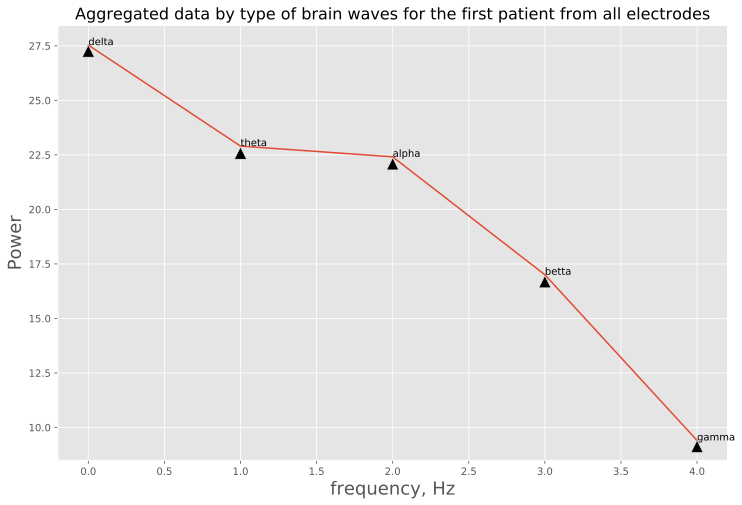

In [114]:
yaxis = data_5_bins_c.loc[0]
xaxis = np.arange(0, 5)
xaxis_text = ['delta', 'theta','alpha','betta','gamma']
plt.figure(figsize=(12,8))
plt.plot(xaxis, yaxis)
plt.xlabel('frequency, Hz', fontsize=18)
plt.ylabel('Power', fontsize=18)

for i, txt in enumerate(xaxis_text):
    plt.annotate(txt, (xaxis[i],yaxis[i]),arrowprops=dict(facecolor='black', shrink=0.5))

plt.title('Aggregated data by type of brain waves for the first patient from all electrodes', fontsize=16)
plt.show()

In [71]:
data_avg.shape

(289, 366)

In [72]:
data_5_bins.shape

(289, 10)

Datasets: 
* data_avg_o (289, 183)
* data_avg_c (289, 183)
* data_avg (289, 366)


* data_5_bins_o (289, 5)
* data_5_bins_c (298 5)
* data_5_bins (289, 10)

In [6]:
df = data_avg
classes = pd.read_csv("classes.csv", header=None)
classes.columns = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuriticism']

In [74]:
from sklearn.decomposition import KernelPCA

[ 0.63670209  0.19999878]


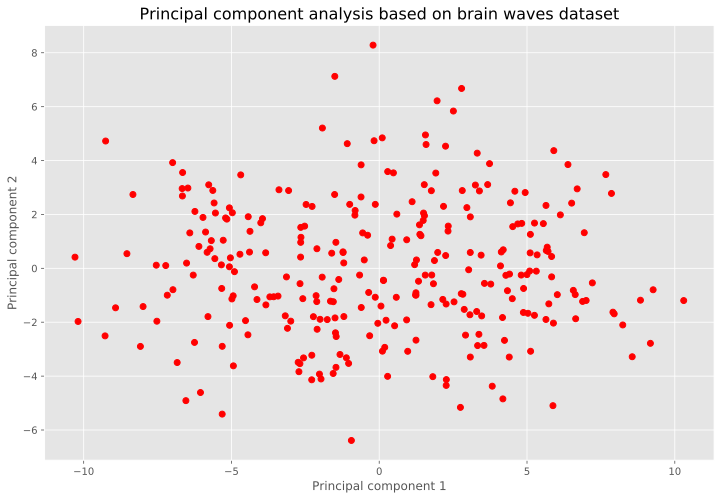

In [141]:
pca_model = PCA(n_components=2, svd_solver = 'arpack')
#svd_solver : string {‘auto’, ‘full’, ‘arpack’, ‘randomized’}

#pca_model = KernelPCA(n_components=2, kernel='poly', degree=3, eigen_solver='auto')
#kernel : “linear” | “poly” | “rbf” | “sigmoid” | “cosine” | “precomputed

pca_model.fit(data_5_bins_o)
print(pca_model.explained_variance_ratio_)  
pca_data = pd.DataFrame(data = pca_model.transform(data_5_bins_o)
             , columns = ['principal component 1', 'principal component 2'])

pca_data = pd.concat([pca_data, classes], axis = 1)
pca_data.head()
plt.figure(figsize=(12,8))
plt.plot(pca_data['principal component 1'], pca_data['principal component 2'], 'ro')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
#plt.title('Principal component analysis based on averaged dataset', fontsize=16)
plt.title('Principal component analysis based on brain waves dataset', fontsize=16)
plt.show()

Text(0.5,1,'PCA to identify the expression of the character traits Extraversion')

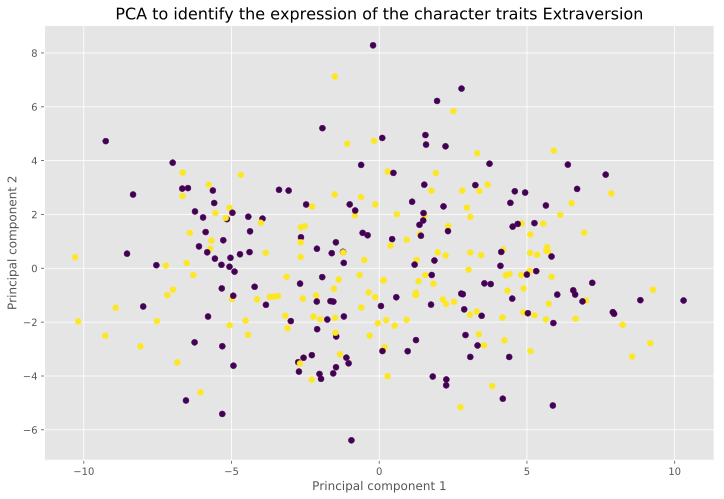

In [120]:
plt.figure(figsize=(12, 8))
plt.scatter(pca_data['principal component 1'], pca_data['principal component 2'], c=pca_data['Extraversion'])
#'Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuriticism'
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('PCA to identify the expression of the character traits Extraversion', fontsize=16)

In [ ]:
from sklearn.manifold import TSNE
k = np.arange(5, 51)
for i in range(len(k)):
    print("**************************")
    print(k[i])
    n_sne = 7000
    tsne = TSNE(n_components=2, verbose=1, perplexity=k[i], n_iter=300)
    tsne_results = tsne.fit_transform(data_5_bins_o)
    df_tsne = pd.DataFrame()
    df_tsne['x-tsne'] = tsne_results[:,0]
    df_tsne['y-tsne'] = tsne_results[:,1]

    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=classes['Extraversion'])
    plt.show()

Text(0.5,1,'Principal component analysis')

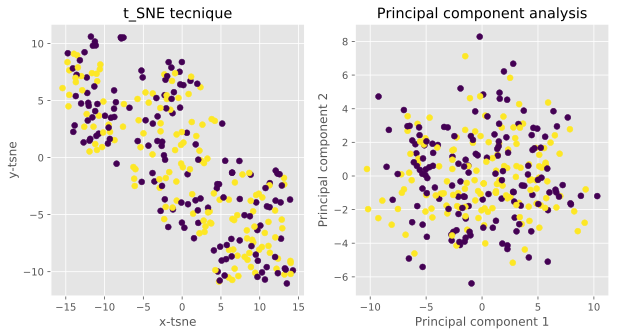

In [128]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.xlabel('x-tsne')
plt.ylabel('y-tsne')
plt.title('t_SNE tecnique')
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=classes['Extraversion'])
plt.subplot(122)
plt.scatter(pca_data['principal component 1'], pca_data['principal component 2'], c=classes['Extraversion'])
#'Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuriticism'

plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Principal component analysis')

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

In [20]:
def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
     # create plot
    plt.figure(figsize=(12, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()

0.566247947455


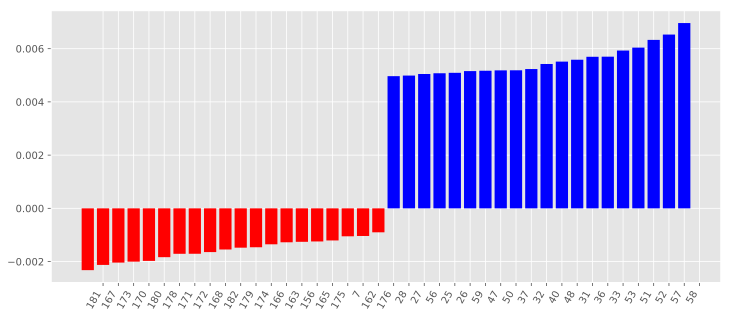

In [28]:
from sklearn.model_selection import cross_val_score
clf = SVC(kernel='linear', C=0.0001)
scores = cross_val_score(clf, data_avg_c, classes['Openness'], cv=10)
openness_true = np.mean(scores)
print(openness_true)
clf.fit(data_avg_c, classes['Openness'])
plot_coefficients(clf, list(data_avg_c))

In [182]:
accuracies_openness = []
for i in range(1000):
    label = shuffle(classes['Openness'])
    clf = SVC(kernel='linear', C=0.0001)
    scores = cross_val_score(clf, data_avg_c, label, cv=10)
    openness = np.mean(scores)
    accuracies_openness.append(openness)

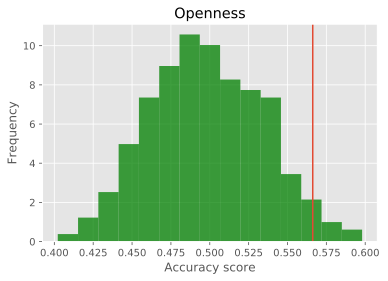

In [183]:
x = np.arange(1000) 
n, bins, patches = plt.hist(accuracies_openness, 15, normed=1, facecolor='green', alpha=0.75)
plt.axvline(x=openness_true)
plt.ylabel('Frequency')
plt.xlabel('Accuracy score')
plt.title('Openness')
plt.show()

In [184]:
np.percentile(accuracies_openness, 95)

0.55861863711001636

0.567430213465


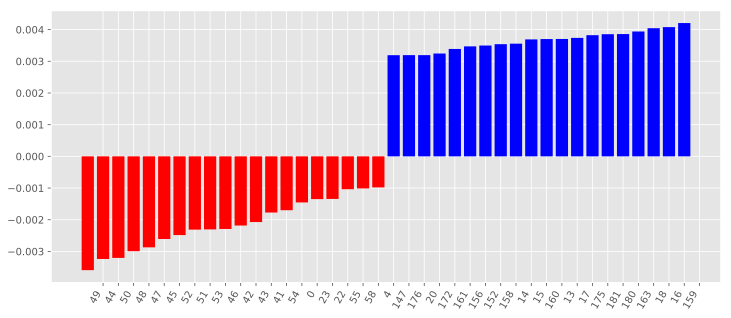

In [29]:
clf = SVC(kernel='linear', C=0.0001)
scores = cross_val_score(clf, data_avg_c, classes['Conscientiousness'], cv=10)
conscientiousness_true = np.mean(scores)
print(conscientiousness_true)
clf.fit(data_avg_c, classes['Conscientiousness'])
plot_coefficients(clf, list(data_avg_c))

In [226]:
accuracies_cons = []
for i in range(1000):
    label = shuffle(classes['Conscientiousness'])
    clf = SVC(kernel='linear', C=0.0001)
    scores = cross_val_score(clf, data_avg_c, label, cv=10)
    cons = np.mean(scores)
    accuracies_cons.append(cons)

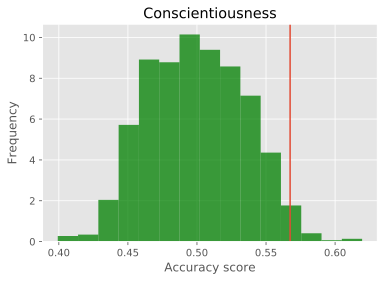

In [227]:
x = np.arange(1000) 
n, bins, patches = plt.hist(accuracies_cons, 15, normed=1, facecolor='green', alpha=0.75)
plt.axvline(x=conscientiousness_true)
plt.ylabel('Frequency')
plt.xlabel('Accuracy score')
plt.title('Conscientiousness')
plt.show()

In [228]:
np.percentile(accuracies_cons, 95)

0.55709893267651878

0.547077175698


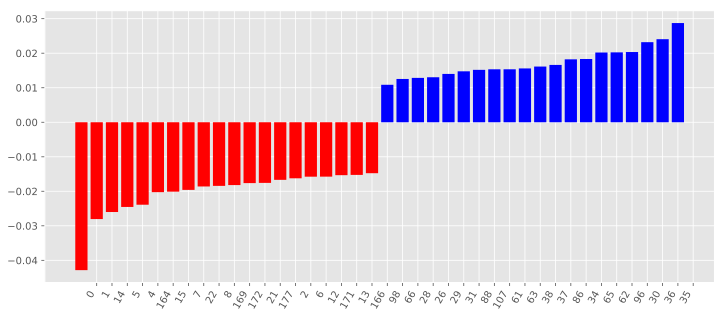

In [27]:
clf = SVC(kernel='linear', C=0.001)
scores = cross_val_score(clf, data_avg_c, classes['Extraversion'], cv=10)
extraversion_true = np.mean(scores)
print(extraversion_true)
clf.fit(data_avg_c, classes['Extraversion'])
plot_coefficients(clf, list(data_avg_c))

In [224]:
accuracies_extraversion = []
for i in range(1000):
    label = shuffle(classes['Extraversion'])
    clf = SVC(kernel='linear', C=0.001)
    scores = cross_val_score(clf, data_avg_c, label, cv=10)
    extraversion = np.mean(scores)
    accuracies_extraversion.append(extraversion)

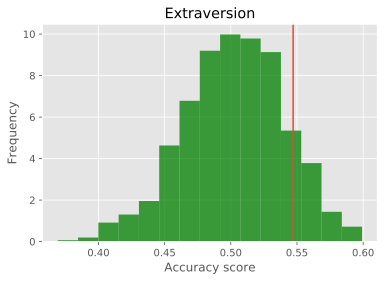

In [225]:
x = np.arange(1000) 
n, bins, patches = plt.hist(accuracies_extraversion, 15, normed=1, facecolor='green', alpha=0.75)
plt.axvline(x=extraversion_true)
plt.ylabel('Frequency')
plt.xlabel('Accuracy score')
plt.title('Extraversion')
plt.show()

In [230]:
np.percentile(accuracies_extraversion, 95)

0.56266009852216747

0.580402298851


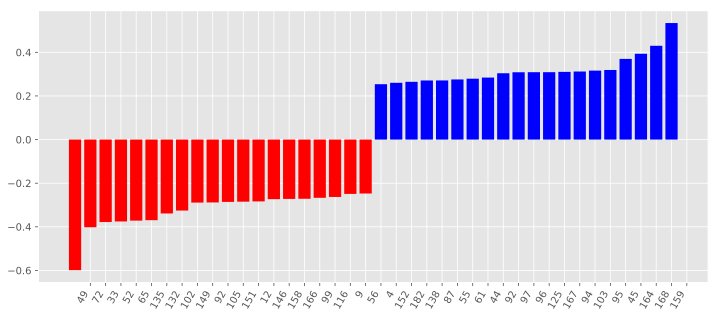

In [26]:
clf = SVC(kernel='linear', C=0.1)
scores = cross_val_score(clf, data_avg, classes['Agreeableness'], cv=10)
agreeableness_true = np.mean(scores)
print(agreeableness_true)
clf.fit(data_avg, classes['Agreeableness'])
plot_coefficients(clf, list(data_avg))

In [32]:
accuracies_agreeableness = []
for i in range(1000):
    label = shuffle(classes['Agreeableness'])
    clf = SVC(kernel='linear', C=0.1)
    scores = cross_val_score(clf, data_avg, label, cv=10)
    agreeableness = np.mean(scores)
    accuracies_agreeableness.append(agreeableness)

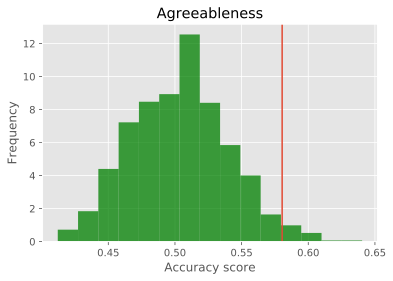

In [33]:
x = np.arange(1000) 
n, bins, patches = plt.hist(accuracies_agreeableness, 15, normed=1, facecolor='green', alpha=0.75)
plt.axvline(x=agreeableness_true)
plt.ylabel('Frequency')
plt.xlabel('Accuracy score')
plt.title('Agreeableness')
plt.show()

In [34]:
np.percentile(accuracies_agreeableness, 95)

0.56421798029556658

0.509334975369


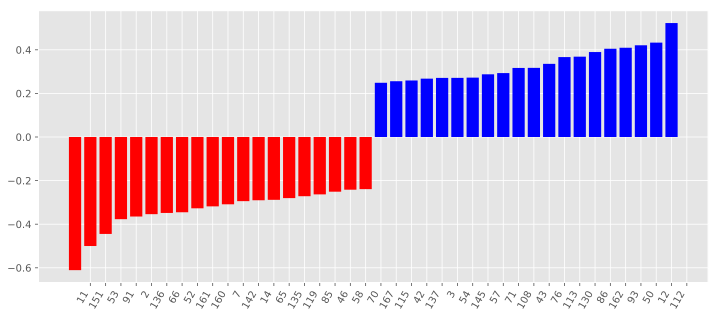

In [30]:
clf = SVC(kernel='linear', C=0.1)
scores = cross_val_score(clf, data_avg, classes['Neuriticism'], cv=10)
neuriticism_true = np.mean(scores)
print(neuriticism_true)
clf.fit(data_avg_c, classes['Neuriticism'])
plot_coefficients(clf, list(data_avg_c))

In [31]:
accuracies_neuriticism = []
for i in range(1000):
    label = shuffle(classes['Neuriticism'])
    clf = SVC(kernel='linear', C=0.1)
    scores = cross_val_score(clf, data_avg, label, cv=10)
    neuriticism = np.mean(scores)
    accuracies_neuriticism.append(neuriticism)

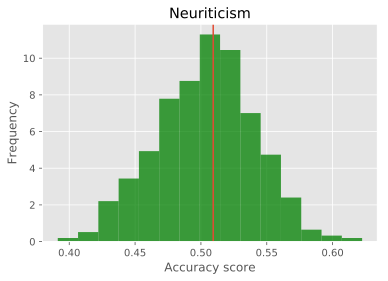

In [35]:
x = np.arange(1000) 
n, bins, patches = plt.hist(accuracies_neuriticism, 15, normed=1, facecolor='green', alpha=0.75)
plt.axvline(x=neuriticism_true)
plt.ylabel('Frequency')
plt.xlabel('Accuracy score')
plt.title('Neuriticism')
plt.show()

In [ ]:
np.percentile(accuracies_neuriticism, 95)